# Informe Operativo de seguridad Balnearia
El objetivo de este informe es analizar y presentar los datos recopilados por el equipo "Náutica Este" durante el operativo de seguridad balnearia temporada 2023-2024, con el fin de proporcionar información para la planificación estratégica de futuras temporadas. Se pretende identificar patrones, tendencias y áreas de mejora, así como optimizar los recursos y protocolos de seguridad.

## Sector: Nautica Este
### Equipo de Trabajo
* Briones Franco
* Salas Daniel
* Pablo Kogan
* Sanchez Micaela (eventual)
* Villavicencio Nicolas (eventual)

### Operación
* Casilla: Balneario Albino Cotro
* Guarda de embarcaciones: Prefectura (isla 132)
* QAP al servicio de Balnearios:
  *  Falher
  *  Albino Cotro
  *  Paseo Limay
* Patrullajes en río Limay:
  * 7.2km Laguna de los Cisnes - Peninsula Hiroki
  * Base durante la jornada:
    * en frente a curva calle Tronador - costa sur
    * en frente de isla 132 (sector playita) - costa sur
* Embarcaciones
  * Semirrigido ODB3: 
  * Moto de Agua Ruso: Yamaha 

### Fuente Información
* Registro del equipo Nautica Este
* Registro Temperatura/Caudales Autoridad Interjurisdiccional de las Cuencas de los ríos Limay, Neuquén y Negro. (AIC)


In [1]:
'''
    <style type="text/css">
      .jp-InputPrompt,.jp-OutputPrompt,.jp-OutputArea-prompt,.jp-CodeMirrorEditor, .jp-RenderedText {
        display: none;
    }
    </style>
'''
import pandas as pd
df = pd.read_csv("librodeaguas.csv")
#df.dtypes
#df.corr()

In [2]:
#selección
#df[['prevenciones','rescates']]

In [3]:
#df.iloc[0:6]

In [4]:
#df[df['embarcacion']=='ODB3']

### Mapa de lugares y zonas de mayor cantidad de prevenciones
(https://pkogan.github.io/pandas/map.html)

In [5]:
from ipyleaflet import Map, Marker, basemaps, Popup, AwesomeIcon, Heatmap
from ipywidgets import HTML
def addlabel(marker,name='life-ring',color='red'):
    icon_color='dark'+color
    #print(icon_color+"*")
    icon1 = AwesomeIcon(
        name=name,
        marker_color=color,
        #icon_color=icon_color,
        spin=False)
    message1 = HTML()
    message1.value = marker.name

#message1.placeholder = "PlaceholderSome HTML"
#message1.description = "DescriptionSome HTML"

    popup = Popup(
        location=marker.location,
        child=message1
    )

    marker.popup=popup
    marker.icon=icon1




lugares=pd.read_csv('lugares.csv')

lugaresagregados=[]
def on_location_changed(event):
    # Do some computation given the new marker location, accessible from `event['new']`
    lugaresagregados.append(marker.location)
    pass


center = (-38.9774, -68.0453)

m = Map(center=center, zoom=13)
m=Map(
    #basemap=basemaps.OpenStreetMap.HOT,
    #basemap=basemaps.OpenTopoMap,
    #basemap=basemaps.Gaode.Satellite,
    basemap=basemaps.Esri.WorldImagery,
    center=center,
    zoom=14
)
locations=[]
for i in df.values:
    locations.append([i[-3],i[-2],i[-6]])

heatmap = Heatmap(
    locations=locations,
    radius=20
)
m.add(heatmap)


# Agregar Puestos
for i in lugares.values:
    marker = Marker( draggable=False)
    marker.location = (i[1],i[2])
    marker.name=i[3]
    addlabel(marker,i[4],i[5])
    m.add(marker)
marker = Marker( draggable=True)
marker.location = center
marker.observe(on_location_changed, 'location')
m.add(marker)


#display(m)

m.layout.width = '100%'
#m.layout.height = '800px'
m.save("map.html")






In [6]:
#df_lugares=pd.DataFrame(lugaresagregados)
#df_lugares.to_csv('lugaresagregados.csv')

In [7]:
#df_temp = pd.read_csv("Temperatura.csv")
#df_temp['fecha']=pd.to_datetime(df_temp["fecha"], format='%d-%m-%Y')



#df_temp


In [8]:
df_temp_aic = pd.read_csv("AIC - Temperatura.csv")
df_temp_aic['Fecha']=pd.to_datetime(df_temp_aic["Fecha"], format='%d/%m/%Y')
#df_temp_aic['TempMax']=pd.to_numeric(df_temp_aic['Temperatura Máxima (ºC)'])
#df_temp_aic['TempMin']=pd.to_numeric(df_temp_aic["Temperatura Mínima (ºC)"])
#df_temp_aic.describe()



In [9]:

df_caudal_aic = pd.read_csv("AIC - Caudal.csv")
df_caudal_aic['Fecha']=pd.to_datetime(df_caudal_aic["Fecha"], format='%d/%m/%Y')

#df_caudal_aic.describe()


In [10]:
def transform(fila):
    return fila['prevenciones']+fila['asistencias']+fila['rescates']

def transform_dia(fila):
    return fila['fechaok'].weekday()

def transform_dia_nombre(fila):
    dias=['0Lunes','1Martes','2Miercoles','3Jueves','4Viernes','5Sabado','6Domingo']
    return dias[fila['dia']]
        
#df['totalAsistencias']=df.apply(transform, axis=1)

df['fechaok']=pd.to_datetime(df["fecha"], format='%d-%m-%Y')

df['dia']=df.apply(transform_dia, axis=1)
df['dia_nombre']=df.apply(transform_dia_nombre, axis=1)
#def transform_nro_semana(fila):
#    return int(fila.index()/7)

#df['semanaNumero']=df.apply(transform_nro_semana, axis=1)

   ### Totales Temporada

In [11]:
totales=df.agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum,
    'fecha':'count'
})
totales['velocidad Media km/h']=round(totales['km']/totales['horas'],2)
totales['consumo Medio l/km']=round(totales['litrosNafta']/totales['km'],2)
totales['consumo Medio l/h']=round(totales['litrosNafta']/totales['horas'],2)
totales['prevenciones Media prevenciones/hora']=round(totales['prevenciones']/totales['horas'],2)
totales

/tmp/ipykernel_76095/3820096621.py:1: FutureWarning: The provided callable <built-in function sum> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  totales=df.agg({


horas                                    177.50
litrosNafta                             1067.50
km                                      2586.00
prevenciones                            1064.00
asistencias                               38.00
rescates                                  16.00
fecha                                     92.00
velocidad Media km/h                      14.57
consumo Medio l/km                         0.41
consumo Medio l/h                          6.01
prevenciones Media prevenciones/hora       5.99
dtype: float64

In [12]:
agrupado_responsable=df.groupby('responsable').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})
agrupado_embarcacion=df.groupby('embarcacion').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})
agrupado_embarcacion['velocidad Media km/h']=round(agrupado_embarcacion['km']/agrupado_embarcacion['horas'],2)
agrupado_embarcacion['consumo Medio l/km']=round(agrupado_embarcacion['litrosNafta']/agrupado_embarcacion['km'],2)
agrupado_embarcacion['consumo Medio l/h']=round(agrupado_embarcacion['litrosNafta']/agrupado_embarcacion['horas'],2)
agrupado_embarcacion['prevenciones Media prevenciones/hora']=round(agrupado_embarcacion['prevenciones']/agrupado_embarcacion['horas'],2)

agrupado_dia=df.groupby('dia_nombre').agg({
    'horas':sum,
    'litrosNafta':sum,
    'km':sum,
    'prevenciones':sum,
    'asistencias':sum,
    'rescates':sum
})


/tmp/ipykernel_76095/2955701402.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  agrupado_responsable=df.groupby('responsable').agg({
/tmp/ipykernel_76095/2955701402.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  agrupado_responsable=df.groupby('responsable').agg({
/tmp/ipykernel_76095/2955701402.py:9: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  agrupado_embarcacion=df.groupby('embarcacion').agg({
/tmp/ipykernel_76095/2955701

  ### Total de km recorridos por embarcación y responsable

In [13]:
agrupado_embarcacion


,horas,litrosNafta,km,prevenciones,asistencias,rescates,velocidad Media km/h,consumo Medio l/km,consumo Medio l/h,prevenciones Media prevenciones/hora
embarcacion,,,,,,,,,,
MRuso,57.5,510.0,978.0,400,5.0,5.0,17.01,0.52,8.87,6.96
ODB3,120.0,557.5,1608.0,664,33.0,11.0,13.40,0.35,4.65,5.53


In [14]:
agrupado_responsable

,horas,litrosNafta,km,prevenciones,asistencias,rescates
responsable,,,,,,
Briones,60.1,381.0,870.0,301,3.0,6.0
Guardia,0.0,0.0,0.0,0,0.0,0.0
Kogan,53.7,314.5,820.0,375,10.0,6.0
Salas,55.4,314.0,756.0,351,25.0,3.0
Sanchez,6.3,50.0,112.0,22,0.0,0.0
Villavicencio,2.0,8.0,28.0,15,0.0,1.0


  ### Medias Temperaturas Máxima (media, min, max) por mes
  Estación:Paseo de la Costa - Latitud: 38°58'39.22"S | Longitud: 68° 2'51.52"O

In [15]:
df_temp_aic['Mes']=df_temp_aic['Fecha'].dt.month
df_temp_aic['Año']=df_temp_aic['Fecha'].dt.year

import numpy as np

agrupado_mes_temperatura=df_temp_aic.groupby(['Año','Mes']).agg({
    'Temperatura Máxima (ºC)': ['mean', 'min', 'max']
})

# Rename the columns for clarity
agrupado_mes_temperatura.columns = ['Media', 'Min', 'Max']
agrupado_mes_temperatura['Media']=round(agrupado_mes_temperatura['Media'],2)


agrupado_mes_temperatura

Media   Min   Max
Año  Mes                   
2023 11   24.88  18.4  32.8
     12   27.75  17.4  35.1
2024 1    32.18  26.5  39.4
     2    29.85  23.7  38.2
     3    25.58  18.2  31.8

  ### Medias Caudales (media, min, max) por mes
  Rigistro Caudales AIC - Embalse Arroyito (m3/s)

In [16]:
# Add 'Mes' and 'Año' columns based on 'Fecha'
df_caudal_aic['Mes'] = df_caudal_aic['Fecha'].dt.month
df_caudal_aic['Año'] = df_caudal_aic['Fecha'].dt.year

# Group by 'Año' and 'Mes' and perform aggregations
agrupado_mes_caudal = df_caudal_aic.groupby(['Año', 'Mes']).agg({
    'Embalse Arroyito (m3/s)': ['mean', 'min', 'max']
})

# Rename the columns for clarity
agrupado_mes_caudal.columns = ['Media', 'Min', 'Max']

# Reset index if needed
#agrupado_mes_caudal = agrupado_mes_caudal.reset_index()

agrupado_mes_caudal['Media']=round(agrupado_mes_caudal['Media'],2)
#agrupado_mes_temperatura['Temperatura Mínima (ºC)']=round(agrupado_mes_temperatura['Temperatura Mínima (ºC)'],2)



agrupado_mes_caudal

Media  Min  Max
Año  Mes                  
2023 11   500.00  500  500
     12   456.65  400  500
2024 1    610.16  400  700
     2    649.10  500  800
     3    373.19  348  500

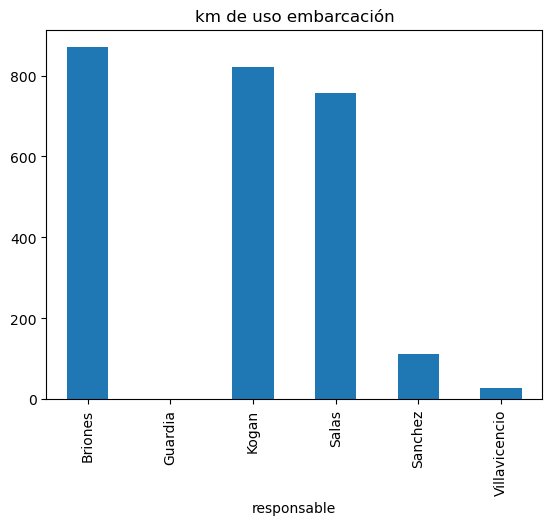

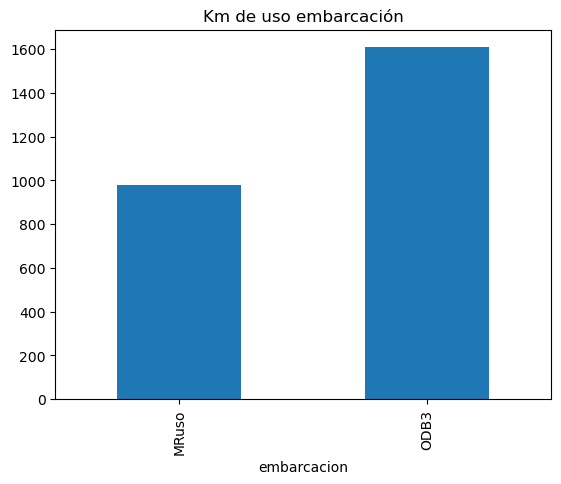

In [17]:
import matplotlib.pyplot as plt
agrupado_responsable['km'].plot(kind='bar',title='km de uso embarcación')
plt.show()
agrupado_embarcacion['km'].plot(kind='bar',title='Km de uso embarcación')

plt.show()

  ### Total de horas por embarcación y responsable

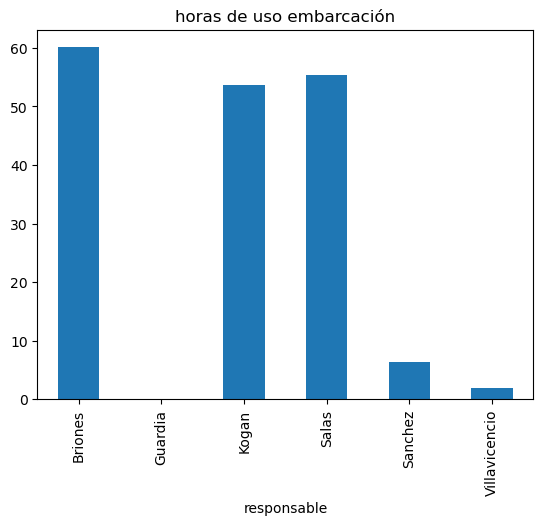

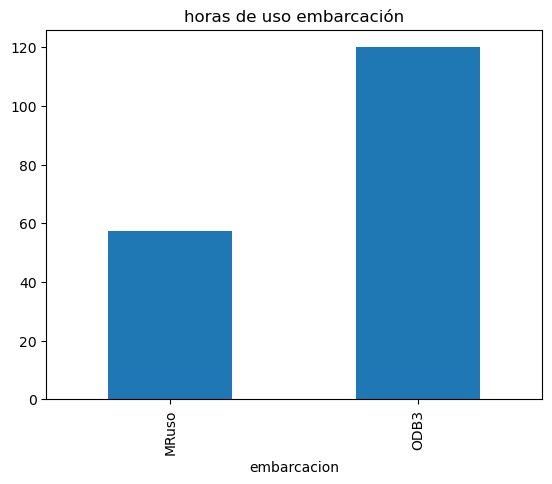

In [18]:
import matplotlib.pyplot as plt
agrupado_responsable['horas'].plot(kind='bar',title='horas de uso embarcación')
plt.show()
agrupado_embarcacion['horas'].plot(kind='bar',title='horas de uso embarcación')

plt.show()

### Prevenciones - Temperatura Máxima - Caudales por día Temporada

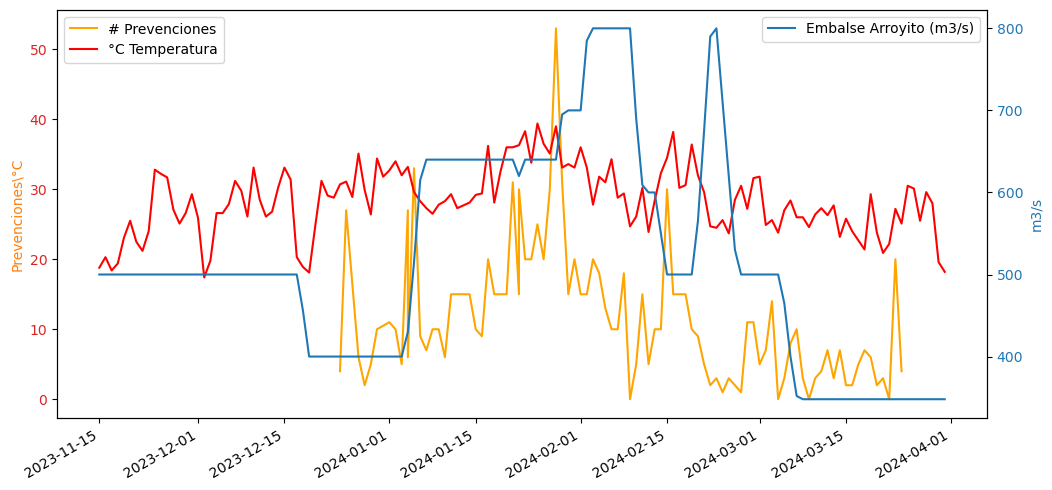

In [19]:
#df.plot(kind='line',x='fechaok',y='prevenciones',title='Prevenciones')
#df_temp.plot(kind='line',x='fecha',y='t.mean',title='Prevenciones')
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['fechaok'],df['prevenciones'],label='# Prevenciones',color='orange')
ax.plot(df_temp_aic['Fecha'],df_temp_aic['Temperatura Máxima (ºC)'],label='°C Temperatura',color='red')
ax.set_ylabel('Prevenciones\°C', color='tab:orange')
ax.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax.twinx()
ax2.spines['right'].set_position(('outward', 0))  # Offset the third y-axis
ax2.set_ylabel('m3/s', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

#ax2.bar(daily_stats.index, daily_stats['real_rate_hours'], bar_width, alpha=0.3,label='Real rate', color='tab:orange')

ax2.plot(df_caudal_aic['Fecha'],df_caudal_aic['Embalse Arroyito (m3/s)'],label='Embalse Arroyito (m3/s)')

#ax.xaxis.set_minor_locator(mdates.MonthLocator() )

#fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')
# common to all three:

# Adding legends
lines_1, labels_1 = ax.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
ax.legend(lines_1 , labels_1 , loc='upper left')

fig.autofmt_xdate()

plt.legend()
plt.show()

### Prevenciones, asistencias y rescates por día de la semana

In [20]:
agrupado_dia

,horas,litrosNafta,km,prevenciones,asistencias,rescates
dia_nombre,,,,,,
0Lunes,28.7,138.5,410.0,175,3.0,5.0
1Martes,23.8,148.0,336.0,110,6.0,2.0
2Miercoles,24.3,158.0,364.0,126,6.0,2.0
3Jueves,27.8,194.5,428.0,186,5.0,3.0
4Viernes,22.9,140.0,320.0,131,2.0,2.0
5Sabado,25.3,145.5,364.0,149,13.0,0.0
6Domingo,24.7,143.0,364.0,187,3.0,2.0


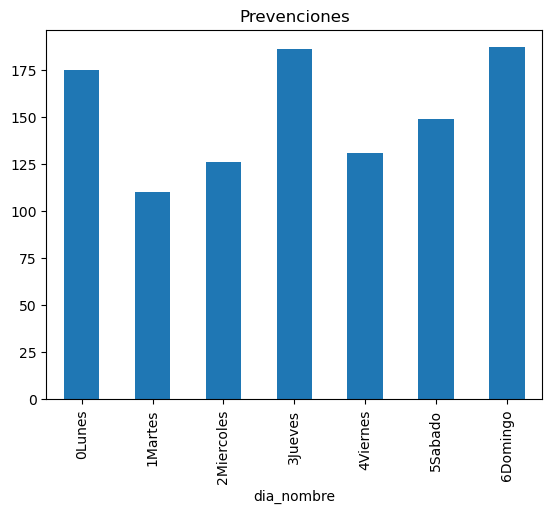

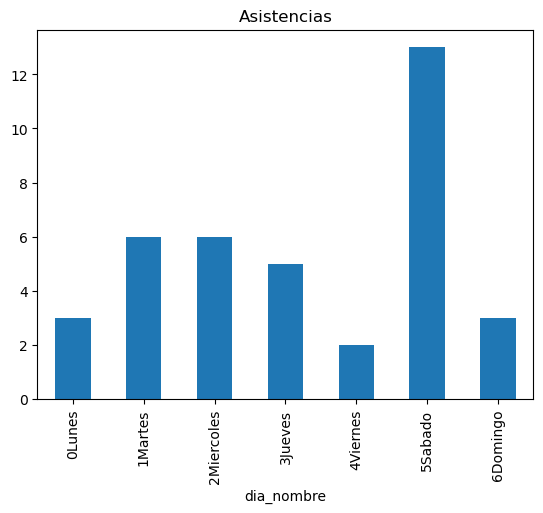

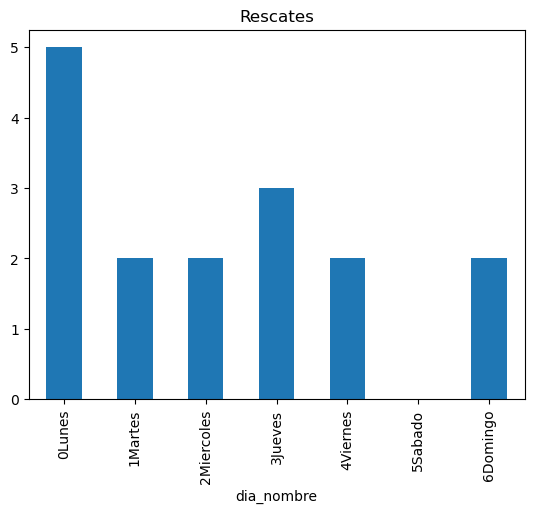

In [21]:
agrupado_dia['prevenciones'].plot(kind='bar',title='Prevenciones')
plt.show()
agrupado_dia['asistencias'].plot(kind='bar',title='Asistencias')
plt.show()
agrupado_dia['rescates'].plot(kind='bar',title='Rescates')
plt.show()
